In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [34]:
dataset = pd.read_csv('combine_data.csv')

In [35]:
dataset.head()

,id,title,userId,rating
0,862,Toy Story,1923,3.0
1,862,Toy Story,2103,5.0
2,862,Toy Story,5380,1.0
3,862,Toy Story,6177,4.0
4,862,Toy Story,6525,4.0


Text(0.5, 0, 'Rating (Out of 5)')

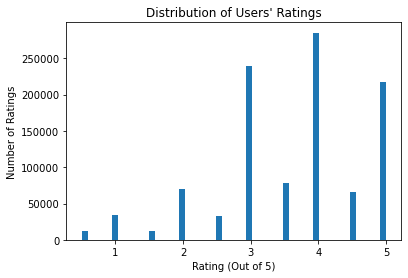

In [36]:
dataset.rating.plot.hist(bins=50)
plt.title("Distribution of Users' Ratings")
plt.ylabel('Number of Ratings')
plt.xlabel('Rating (Out of 5)')

In [37]:
refined_dataset = dataset.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()
#refined_dataset.shape

,userId,title,rating
0,1,Sleepless in Seattle,5.0
1,1,Three Colors: Red,1.0
2,2,Four Rooms,3.0
3,2,Interview with the Vampire,4.0
4,2,Monty Python and the Holy Grail,3.0


In [38]:
num_users = len(refined_dataset['userId'].value_counts())
num_items = len(refined_dataset['title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 197924
Unique number of movies in the dataset: 284


In [39]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.5,11570
1.0,34830
1.5,11628
2.0,69481
2.5,33292
3.0,240153
3.5,78065
4.0,285359
4.5,66446


Text(0, 0.5, 'number of ratings')

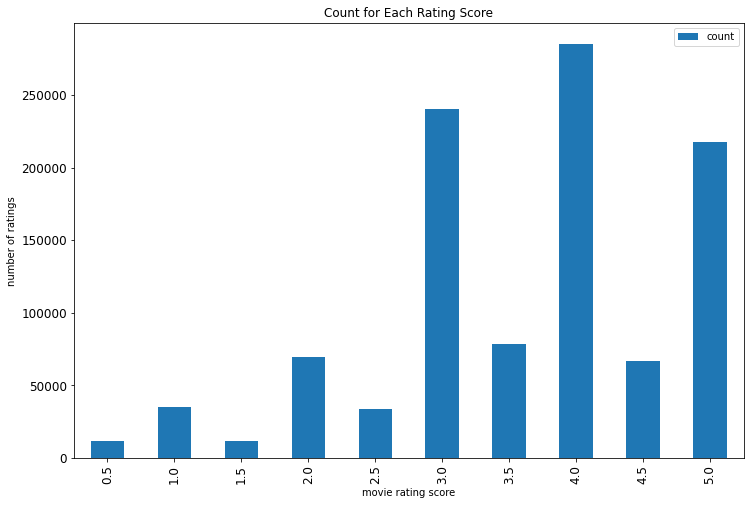

In [40]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [41]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

55161841

In [42]:
# append counts of zero rating to df_ratings_cnt
rating_count_df = rating_count_df.append(
    pd.DataFrame({'count': zero_count}, index=[0.0]),
    verify_integrity=True,
).sort_index()
rating_count_df

,count
0.0,55161841
0.5,11570
1.0,34830
1.5,11628
2.0,69481
2.5,33292
3.0,240153
3.5,78065
4.0,285359
4.5,66446


In [43]:
movies_count_df = pd.DataFrame(refined_dataset.groupby('title').size(), columns=['count'])
movies_count_df.head()

,count
title,
"20,000 Leagues Under the Sea",16819
2001: A Space Odyssey,23128
A Christmas Carol,86
A Close Shave,6382
A Fish Called Wanda,46


Text(0, 0.5, 'number of ratings')

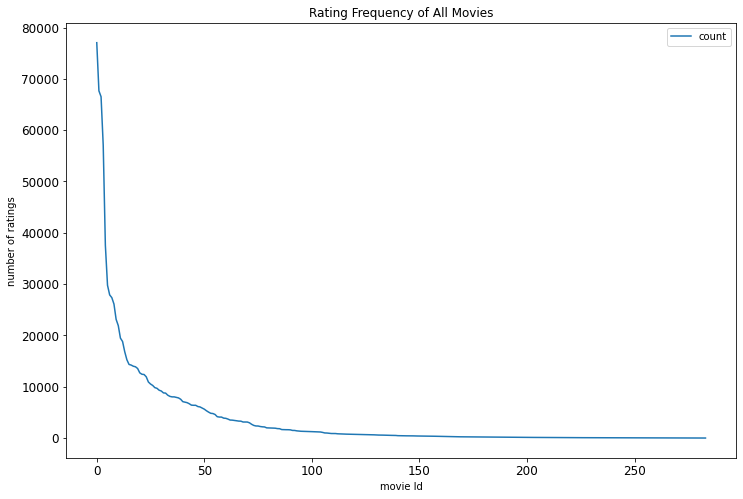

In [44]:
# plot rating frequency of all movies
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")